## Import libraries

In [127]:
# Import all the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import *
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [128]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Read Dataset

In [129]:
data = pd.read_excel("cars_multiple_pages_VF.xlsx")
data.head()

,Name,Mileage,Localite,Year,Transmission,Horsepower,Energie,Boite,Price
0,Volkswagen Polo R-Line,153000km,Tunis,2016,Traction,4 cv,Essence,Manuelle,34000
1,Volkswagen Golf 6 Style,212000km,Tunis,2012,Traction,5 cv,Essence,Manuelle,39000
2,Ford Ecosport,166000km,Ariana,2018,Traction,7 cv,Essence,Manuelle,53000
3,Opel Corsa,174000km,Gafsa,2015,Traction,4 cv,Essence,Manuelle,30000
4,Toyota Corolla,66000km,Tunis,2022,Traction,6 cv,Essence,Automatique,73000


## Explore dataset and features

In [130]:
data.shape

(588, 9)

In [131]:
data.isnull().sum()

,0
Name,0
Mileage,0
Localite,0
Year,0
Transmission,0
Horsepower,0
Energie,0
Boite,0
Price,0


In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          588 non-null    object
 1   Mileage       588 non-null    object
 2   Localite      588 non-null    object
 3   Year          588 non-null    int64 
 4   Transmission  588 non-null    object
 5   Horsepower    588 non-null    object
 6   Energie       588 non-null    object
 7   Boite         588 non-null    object
 8   Price         588 non-null    object
dtypes: int64(1), object(8)
memory usage: 41.5+ KB


In [133]:
data.describe()

,Year
count,588.000000
mean,2018.433673
std,4.047506
min,1989.000000
25%,2017.000000
50%,2019.500000
75%,2021.000000
max,2024.000000


In [134]:
data.Name.unique()

array(['Volkswagen Polo R-Line', 'Volkswagen Golf 6 Style',
       'Ford Ecosport ', 'Opel Corsa ', 'Toyota Corolla ',
       'Jeep Compass ', 'Mercedes-Benz Classe E coupé 200',
       'Cupra Formentor ', 'Mercedes-Benz Classe A ', 'Porsche Cayenne ',
       'Jaguar XF ', 'Jaguar F-Type ', 'Land Rover Range Rover Sport ',
       'Jaguar F-Pace ', 'BMW Série 5 ', 'Honda City LX',
       'Audi A7 Sportback Sportback',
       'Land Rover Range Rover Velar R- DYNAMIC', 'Smart ForTwo Sport',
       'Volkswagen Golf 8 ', 'Ford Ecosport Titanium',
       'Volkswagen Golf 7 SmartLine', 'Mercedes-Benz GLA AMG',
       'Renault Clio Comfort', 'BMW Série 5 Business Line',
       'Citroën Berlingo Multispace 5 places', 'Ford Focus Comfort',
       'Chevrolet Sonic Comfort', 'Mercedes-Benz CLA Business',
       'Chery QQ Nouveau', 'Peugeot 208 Confort',
       'Skoda Octavia Comfort Line',
       'Mercedes-Benz Classe C C200 KIT AMG',
       'Land Rover Range Rover Evoque R-DYNAMIC',
       'BMW S

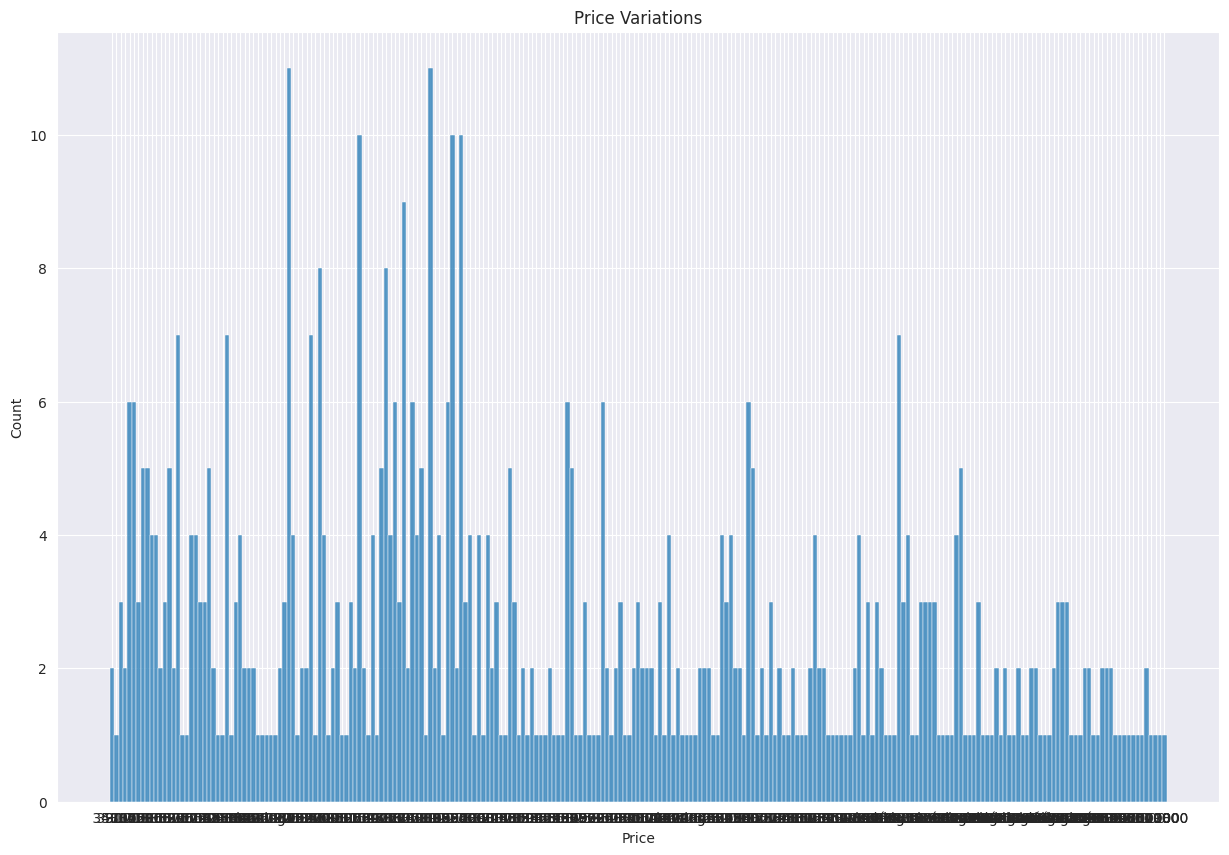

In [135]:
sns.set_style("darkgrid")
plt.figure(figsize=(15, 10))
sns.histplot(data.Price)
plt.title("Price Variations")
plt.show()

## Data Preparation

* Data conversion and cleaning

In [136]:
#Get the list of numerical columns and categorical columns to explore them
numeric_data = list((data.select_dtypes(include=[np.number])).columns)
categorical_data = list((data.select_dtypes(exclude=[np.number])).columns)
categorical_data.remove('Name')

print("Categorical features :", categorical_data)
print()
print("Numerical features :", numeric_data)

Categorical features : ['Mileage', 'Localite', 'Transmission', 'Horsepower', 'Energie', 'Boite', 'Price']

Numerical features : ['Year']


In [137]:
#Explore the categorical features
"""
In this part we are going to create a full_summry to the categorical columns where we will get the number
of missing values for each column and how many category per column and the most existing category per column
"""
categorical_sum = data[categorical_data].describe()
for column in categorical_data:
    categorical_sum.loc['missing',column] = data[column].isnull().sum()
    categorical_sum.loc['values',column] = data[column].unique()
categorical_sum

,Mileage,Localite,Transmission,Horsepower,Energie,Boite,Price
count,588,588,588,588,588,588,588
unique,218,14,3,28,3,2,239
top,40000km,Tunis,Traction,8 cv,Essence,Automatique,98000
freq,23,423,502,98,432,425,11
missing,0,0,0,0,0,0,0
values,"[153000km, 212000km, 166000km, 174000km, 66000...","[Tunis, Ariana, Gafsa, Médenine, Ben Arous, Ka...","[Traction, Propulsion, Intégrale]","[4 cv, 5 cv, 7 cv, 6 cv, 11 cv, 40 cv, 16 cv, ...","[Essence, Diesel, Hybride]","[Manuelle, Automatique]","[ 34000, 39000, 53000, 30000, 73000, 1050..."


In [138]:
#Explore the numerical features
numerical_sum = data[numeric_data].describe()
for column in numeric_data:
    numerical_sum.loc['missing',column] = data[column].isnull().sum()
numerical_sum

,Year
count,588.000000
mean,2018.433673
std,4.047506
min,1989.000000
25%,2017.000000
50%,2019.500000
75%,2021.000000
max,2024.000000
missing,0.000000


In [139]:
# number & % of values missing in each column
values_list = list()
counts_list = list()
cols_list = list()

for col in (numeric_data+categorical_data):
    pct_missing = (data[col].isnull().sum()/len(data))*100 #calculate the percentage of missing data
    cot_missing = data[col].isnull().sum() #calculate the number of missing data
    cols_list.append(col)
    counts_list.append(cot_missing)
    values_list.append(pct_missing)

pct_missing_df = pd.DataFrame()
pct_missing_df['col'] = cols_list
pct_missing_df['pct_missing'] = values_list
pct_missing_df['count_missing'] = counts_list

#We will have dataframe that contains the name, the percenatge per column and the count of missing values
pct_missing_df

,col,pct_missing,count_missing
0,Year,0.0,0
1,Mileage,0.0,0
2,Localite,0.0,0
3,Transmission,0.0,0
4,Horsepower,0.0,0
5,Energie,0.0,0
6,Boite,0.0,0
7,Price,0.0,0


In [140]:
#Transform the set of labels from strings to a suitable encoding such that they can be used with a classifier using LabelEncoder
'''le = LabelEncoder()
for i in categorical_data :
    data[i] = le.fit_transform(data[i])
data.info()'''
#Transform the set of labels from strings to a suitable encoding such that they can be used with a classifier using LabelEncoder
le = LabelEncoder()
for i in categorical_data :
    data[i] = le.fit_transform(data[i].astype(str)) # Cast the column to string type before applying LabelEncoder
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          588 non-null    object
 1   Mileage       588 non-null    int64 
 2   Localite      588 non-null    int64 
 3   Year          588 non-null    int64 
 4   Transmission  588 non-null    int64 
 5   Horsepower    588 non-null    int64 
 6   Energie       588 non-null    int64 
 7   Boite         588 non-null    int64 
 8   Price         588 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 41.5+ KB


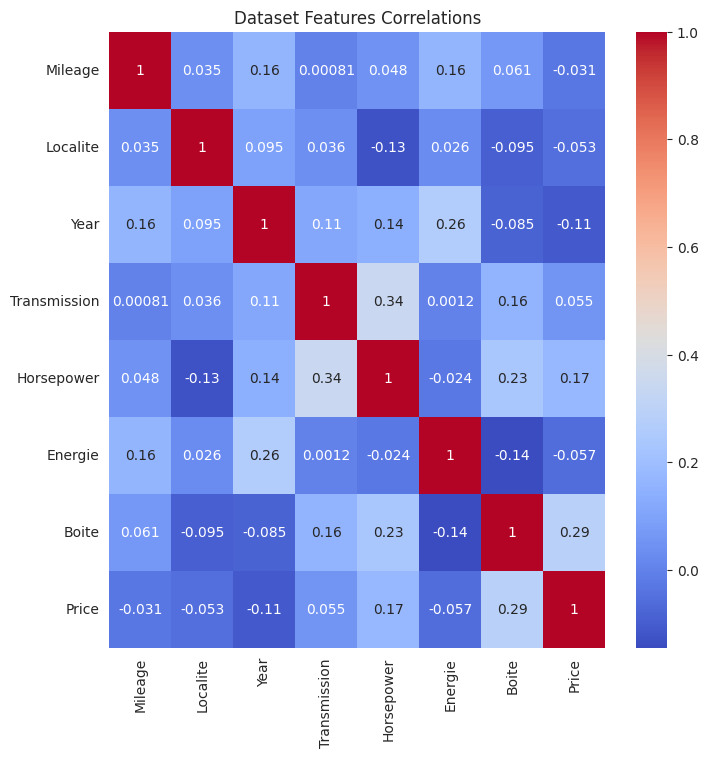

In [141]:
'''plt.figure(figsize=(8, 8))
correlations = data.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.title("Dataset Features Correlations")
plt.show()'''
import seaborn as sns
import matplotlib.pyplot as plt

# Sélectionner uniquement les colonnes numériques
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculer les corrélations
correlations = numeric_data.corr()

# Afficher la heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.title("Dataset Features Correlations")
plt.show()

* Data splitting

In [142]:
# Split the data into 20% test and 80% taining
X = data.drop(["Price", "Name", "Localite"], axis=1)
y = data["Price"]

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

## Model Training

* **LinearRegression**

In [143]:
# Model training
model_lr = linear_model.LinearRegression()
model_lr.fit(xtrain, ytrain)

LinearRegression()

In [144]:
# Model evaluation
y_pred = model_lr.predict(xtest)

# Calculate evaluation metrics
r2 = r2_score(ytest, y_pred)
evs = explained_variance_score(ytest, y_pred)

# Print the results
print("R2 Score: {:.2f} %".format(r2*100))
print("Explained variance score: {:.2f} %".format(evs*100))

R2 Score: 2.30 %
Explained variance score: 2.34 %


* **DecisionTreeRegressor**

In [145]:
# Model training
model_dt = DecisionTreeRegressor(random_state = 0)
model_dt.fit(xtrain, ytrain)

DecisionTreeRegressor(random_state=0)

In [146]:
# Model evaluation
y_pred = model_dt.predict(xtest)

# Calculate evaluation metrics
r2 = r2_score(ytest, y_pred)
evs = explained_variance_score(ytest, y_pred)

# Print the results
print("R2 Score: {:.2f} %".format(r2*100))
print("Explained variance score: {:.2f} %".format(evs*100))

R2 Score: -57.56 %
Explained variance score: -57.43 %


* **RandomForestRegressor**

In [147]:
# Model training
model_rf = RandomForestRegressor(random_state = 0)
model_rf.fit(xtrain, ytrain)

RandomForestRegressor(random_state=0)

In [148]:
# Model evaluation
y_pred = model_rf.predict(xtest)

# Calculate evaluation metrics
r2 = r2_score(ytest, y_pred)
evs = explained_variance_score(ytest, y_pred)

# Print the results
print("R2 Score: {:.2f} %".format(r2*100))
print("Explained variance score: {:.2f} %".format(evs*100))

R2 Score: -0.08 %
Explained variance score: 0.21 %


* **GradientBoostingRegressor**

In [149]:
# Model training
model_GB = GradientBoostingRegressor(random_state = 0)
model_GB.fit(xtrain, ytrain)

GradientBoostingRegressor(random_state=0)

In [150]:
# Model evaluation
y_pred = model_GB.predict(xtest)

# Calculate evaluation metrics
r2 = r2_score(ytest, y_pred)
evs = explained_variance_score(ytest, y_pred)

# Print the results
print("R2 Score: {:.2f} %".format(r2*100))
print("Explained variance score: {:.2f} %".format(evs*100))

R2 Score: -0.17 %
Explained variance score: -0.10 %


> **It seems that GradientBoostingRegressor and RandomForestRegressor are the best Regressor among the tested ones**

## Exploring Results

In [151]:
name = list(data.Name)
price = y
pre_price_lr = model_lr.predict(X)
pre_price_rf = model_rf.predict(X)
pre_price_gb = model_GB.predict(X)


prediction_df = pd.DataFrame({'Name': name, 'Actual Price': price,
                              'Predicted Price (LinearRegression)': pre_price_lr
                             , 'Predicted Price (RandomForest)': pre_price_rf
                             , 'Predicted Price (GradientBoost)': pre_price_gb})

prediction_df["Predicted Price (LinearRegression)"] = prediction_df["Predicted Price (LinearRegression)"].astype('int')
prediction_df["Predicted Price (RandomForest)"] = prediction_df["Predicted Price (RandomForest)"].astype('int')
prediction_df["Predicted Price (GradientBoost)"] = prediction_df["Predicted Price (GradientBoost)"].astype('int')

prediction_df

,Name,Actual Price,Predicted Price (LinearRegression),Predicted Price (RandomForest),Predicted Price (GradientBoost)
0,Volkswagen Polo R-Line,121,161,124,120
1,Volkswagen Golf 6 Style,136,173,131,131
2,Ford Ecosport,166,165,165,160
3,Opel Corsa,114,163,120,134
4,Toyota Corolla,200,112,197,151
...,...,...,...,...,...
583,Toyota RAV 4 Hybride,23,123,62,80
584,Audi Q2,213,121,180,153
585,Peugeot RCZ,157,181,161,145
586,Audi A3,233,125,203,207
